In [1]:
%pylab
%matplotlib inline
%load_ext watermark
%watermark -v -m -p scipy,sklearn,numpy

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib
CPython 2.7.12
IPython 5.1.0

scipy 0.18.1
sklearn 0.18.1
numpy 1.12.0

compiler   : GCC 4.2.1 (Based on Apple Inc. build 5658) (LLVM build 2336.11.00)
system     : Darwin
release    : 16.4.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit


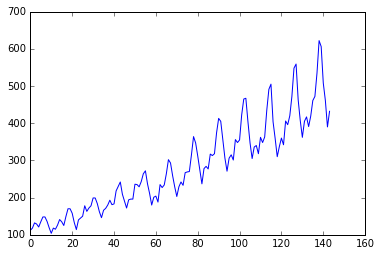

In [2]:
import pandas
import matplotlib.pyplot as plt

dataset = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()

In [3]:
import numpy
import matplotlib.pyplot as plt
import pandas
from keras.models import Sequential
from keras.layers import Dense

# fix random seed for reproducibility
numpy.random.seed(7)

Using TensorFlow backend.


In [4]:
# load the dataset
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

In [5]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

(96, 48)


In [6]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [9]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

print trainX[:5]
print trainY[:5]

[[ 112.]
 [ 118.]
 [ 132.]
 [ 129.]
 [ 121.]]
[ 118.  132.  129.  121.  135.]


In [10]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=200, batch_size=2, verbose=2)

Epoch 1/200
0s - loss: 46211.7889
Epoch 2/200
0s - loss: 32824.0573
Epoch 3/200
0s - loss: 22463.3847
Epoch 4/200
0s - loss: 14574.2490
Epoch 5/200
0s - loss: 9015.9301
Epoch 6/200
0s - loss: 5305.5743
Epoch 7/200
0s - loss: 3040.9822
Epoch 8/200
0s - loss: 1736.5572
Epoch 9/200
0s - loss: 1064.1941
Epoch 10/200
0s - loss: 751.0096
Epoch 11/200
0s - loss: 613.6888
Epoch 12/200
0s - loss: 564.4179
Epoch 13/200
0s - loss: 543.9144
Epoch 14/200
0s - loss: 539.3391
Epoch 15/200
0s - loss: 538.5246
Epoch 16/200
0s - loss: 537.5370
Epoch 17/200
0s - loss: 546.8038
Epoch 18/200
0s - loss: 548.7347
Epoch 19/200
0s - loss: 539.2023
Epoch 20/200
0s - loss: 539.8034
Epoch 21/200
0s - loss: 538.0942
Epoch 22/200
0s - loss: 537.0314
Epoch 23/200
0s - loss: 538.4210
Epoch 24/200
0s - loss: 536.7596
Epoch 25/200
0s - loss: 539.7120
Epoch 26/200
0s - loss: 540.2790
Epoch 27/200
0s - loss: 539.8297
Epoch 28/200
0s - loss: 538.8166
Epoch 29/200
0s - loss: 539.6627
Epoch 30/200
0s - loss: 541.0410
Epoch 

In [11]:
# estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 532.59 MSE (23.08 RMSE)
Test Score: 2358.07 MSE (48.56 RMSE)


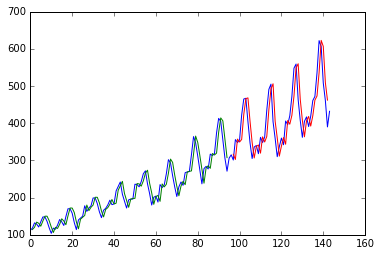

In [12]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
 
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
 
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
 
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [13]:
# reshape dataset
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

print trainX[:5]
print trainY[:5]

[[ 112.  118.  132.]
 [ 118.  132.  129.]
 [ 132.  129.  121.]
 [ 129.  121.  135.]
 [ 121.  135.  148.]]
[ 129.  121.  135.  148.  148.]


In [14]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=200, batch_size=2, verbose=2)

Epoch 1/200
0s - loss: 83671.8294
Epoch 2/200
0s - loss: 40638.3085
Epoch 3/200
0s - loss: 17466.7385
Epoch 4/200
0s - loss: 6076.9101
Epoch 5/200
0s - loss: 2034.2136
Epoch 6/200
0s - loss: 932.3104
Epoch 7/200
0s - loss: 748.6754
Epoch 8/200
0s - loss: 734.4747
Epoch 9/200
0s - loss: 727.3987
Epoch 10/200
0s - loss: 726.3489
Epoch 11/200
0s - loss: 722.0118
Epoch 12/200
0s - loss: 719.5558
Epoch 13/200
0s - loss: 714.6521
Epoch 14/200
0s - loss: 714.7315
Epoch 15/200
0s - loss: 711.5931
Epoch 16/200
0s - loss: 712.9244
Epoch 17/200
0s - loss: 709.0207
Epoch 18/200
0s - loss: 723.3592
Epoch 19/200
0s - loss: 704.4948
Epoch 20/200
0s - loss: 722.6836
Epoch 21/200
0s - loss: 701.0576
Epoch 22/200
0s - loss: 709.4541
Epoch 23/200
0s - loss: 690.1373
Epoch 24/200
0s - loss: 692.1519
Epoch 25/200
0s - loss: 680.6153
Epoch 26/200
0s - loss: 694.8279
Epoch 27/200
0s - loss: 678.1819
Epoch 28/200
0s - loss: 713.8649
Epoch 29/200
0s - loss: 667.2840
Epoch 30/200
0s - loss: 673.4817
Epoch 31/20

In [15]:
# estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 481.13 MSE (21.93 RMSE)
Test Score: 1986.48 MSE (44.57 RMSE)


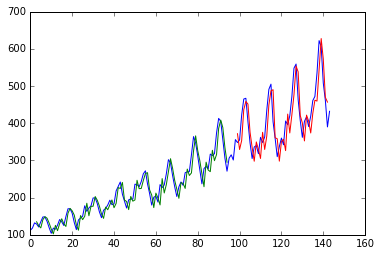

In [16]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()